CCT College Dublin
Higher Diploma in Science in Data Analytics
Module: Strategic Thinking
Assignment: CA2 Capstone Report

Student Name: Nasandolgor 
Student ID: 2025354


Title of the Report:
Gobi JSC – Sales Analysis: Examining Whether Seasonal Fluctuations Affect Sales

In [8]:
#1. Library импортлох
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Dataset унших
df = pd.read_excel("Gobi.xlsx")

df.head()

,date,year,month,month_name,total_revenue_mnt_million,online_revenue_mnt_million,store_revenue_mnt_million,export_revenue_mnt_million,units_sold,avg_unit_price_mnt,marketing_spend_mnt_million,cost_mnt_million,profit_mnt_million
0,2017-01-01,2017,1,Jan,1444.7,268.4,613.5,562.8,1342,1076528,54.3,1132.925070,311.774930
1,2017-02-01,2017,2,Feb,1477.6,292.0,612.1,573.5,1371,1077753,55.6,1205.040037,272.559963
2,2017-03-01,2017,3,Mar,1614.2,321.8,680.3,612.1,1485,1087003,78.4,1295.341703,318.858297
3,2017-04-01,2017,4,Apr,1717.1,327.3,762.9,626.9,1569,1094391,87.0,1398.845439,318.254561
4,2017-05-01,2017,5,May,1534.8,266.5,731.7,536.6,1348,1138576,77.3,1235.050943,299.749057


In [9]:
#2. DESCRIPTIVE STATISTICS — Тайлбар ба код
#Үндсэн статистикууд гаргах
df.describe()

,date,year,month,total_revenue_mnt_million,online_revenue_mnt_million,store_revenue_mnt_million,export_revenue_mnt_million,units_sold,avg_unit_price_mnt,marketing_spend_mnt_million,cost_mnt_million,profit_mnt_million
count,96,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,9.600000e+01,96.000000,96.000000,96.000000
mean,2020-12-15 17:00:00,2020.500000,6.500000,1329.952083,215.158333,635.882292,478.909375,1225.791667,1.085708e+06,77.719792,1065.988050,202.627448
min,2017-01-01 00:00:00,2017.000000,1.000000,768.600000,92.700000,385.800000,261.900000,677.000000,9.867770e+05,34.700000,618.381999,-47.964797
25%,2018-12-24 06:00:00,2018.750000,3.750000,1156.450000,168.175000,539.625000,411.175000,1054.750000,1.063937e+06,57.450000,926.594072,123.842900
50%,2020-12-16 12:00:00,2020.500000,6.500000,1316.550000,209.550000,640.550000,477.300000,1232.000000,1.083067e+06,79.000000,1068.144295,246.775455
75%,2022-12-08 18:00:00,2022.250000,9.250000,1491.875000,259.300000,724.375000,552.175000,1353.250000,1.114729e+06,95.250000,1195.232414,297.375742
max,2024-12-01 00:00:00,2024.000000,12.000000,1938.300000,386.500000,936.600000,735.000000,1779.000000,1.184950e+06,120.300000,1572.790919,384.286177
std,NaN,2.303316,3.470174,251.632926,64.009199,123.955928,95.580278,231.283054,3.932403e+04,23.119295,205.903108,128.356773


Тайлбар:
-describe() нь mean, std, min/max, quartile-уудыг харуулна.
-Энэ нь тухайн хувьсагчдын түвшин, тархалт, хэлбэлзлийг ойлгоход тусалдаг.

In [10]:
#3. Missing Data Analysis (Дутуу өгөгдөл)
# Нийт хувьсгаар дутуу өгөгдлийн хувь
df.isnull().mean() * 100

date                           0.0
year                           0.0
month                          0.0
month_name                     0.0
total_revenue_mnt_million      0.0
online_revenue_mnt_million     0.0
store_revenue_mnt_million      0.0
export_revenue_mnt_million     0.0
units_sold                     0.0
avg_unit_price_mnt             0.0
marketing_spend_mnt_million    0.0
cost_mnt_million               0.0
profit_mnt_million             0.0
dtype: float64

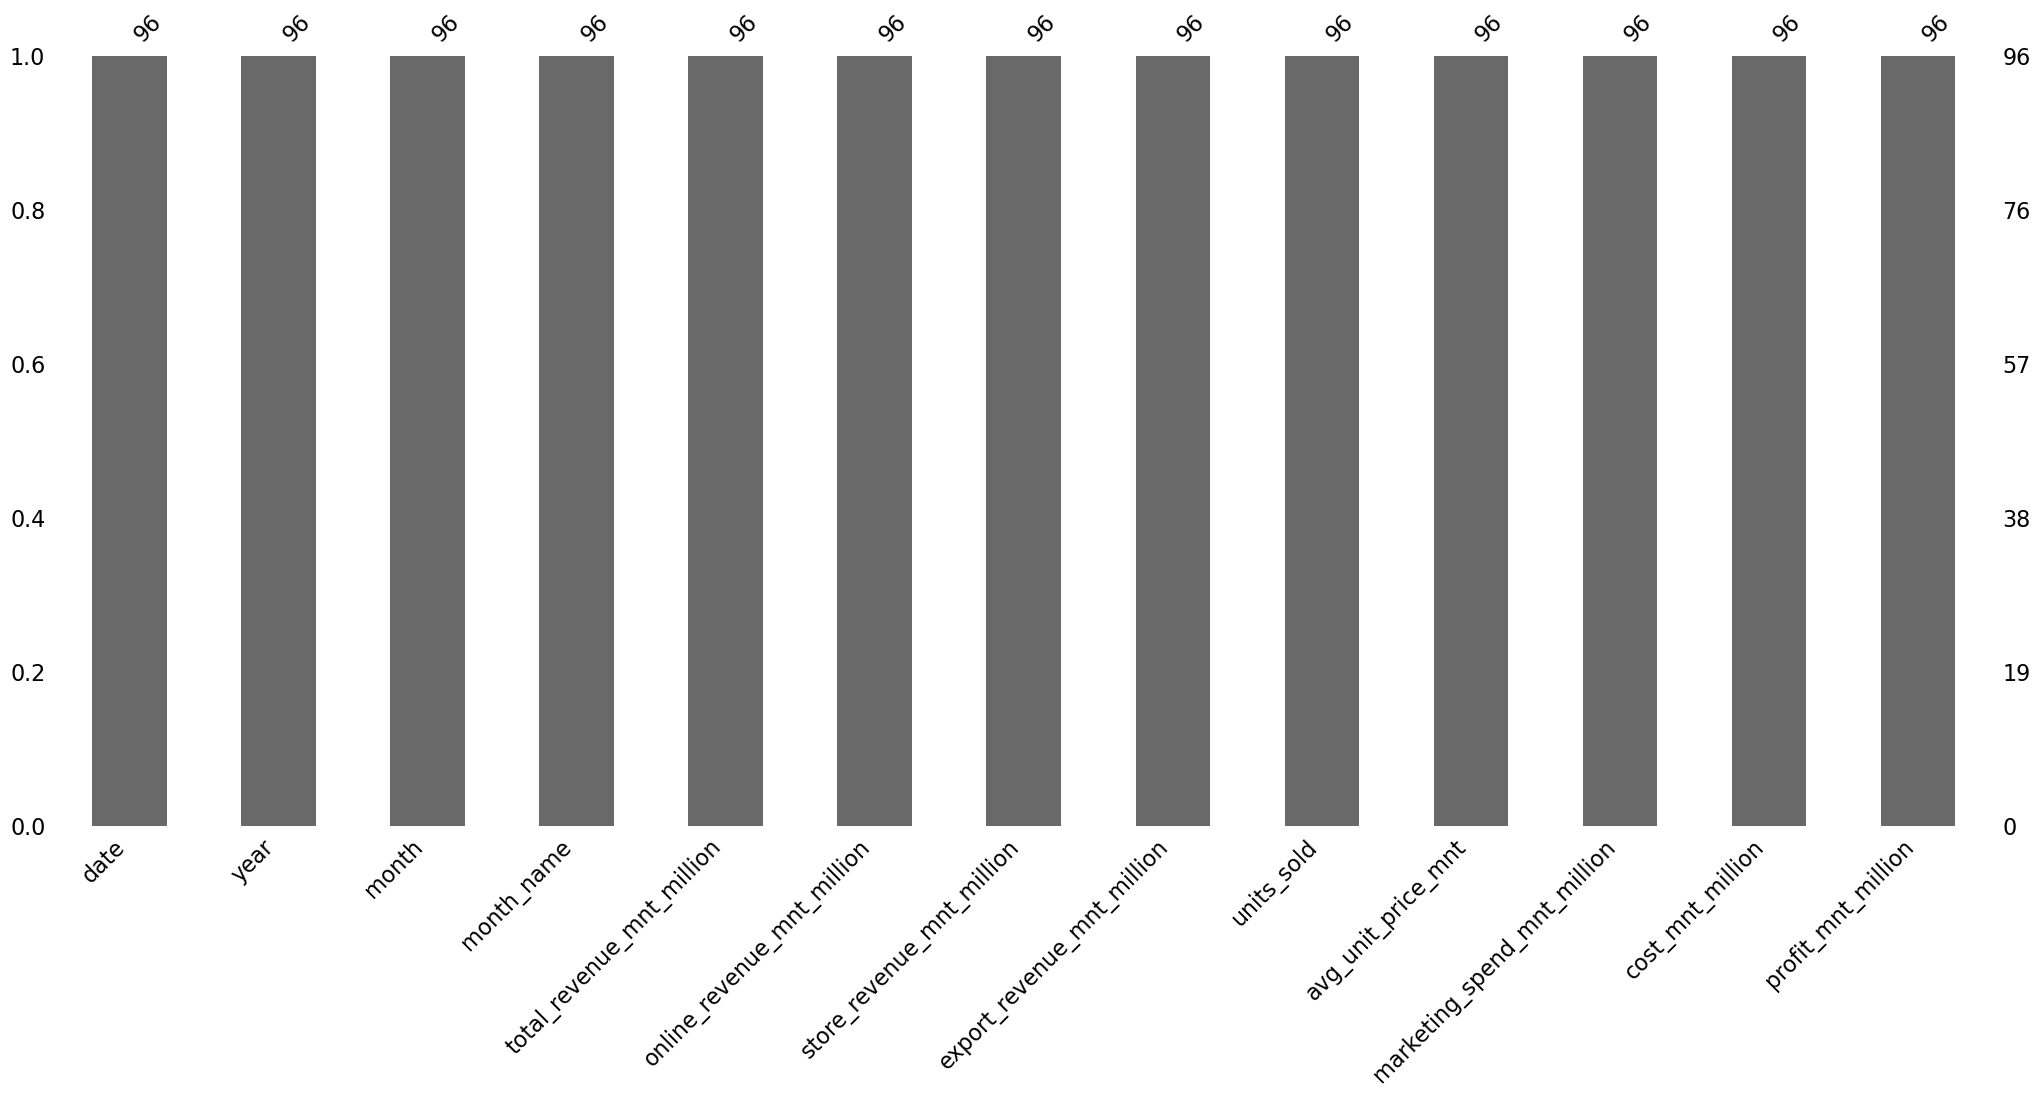

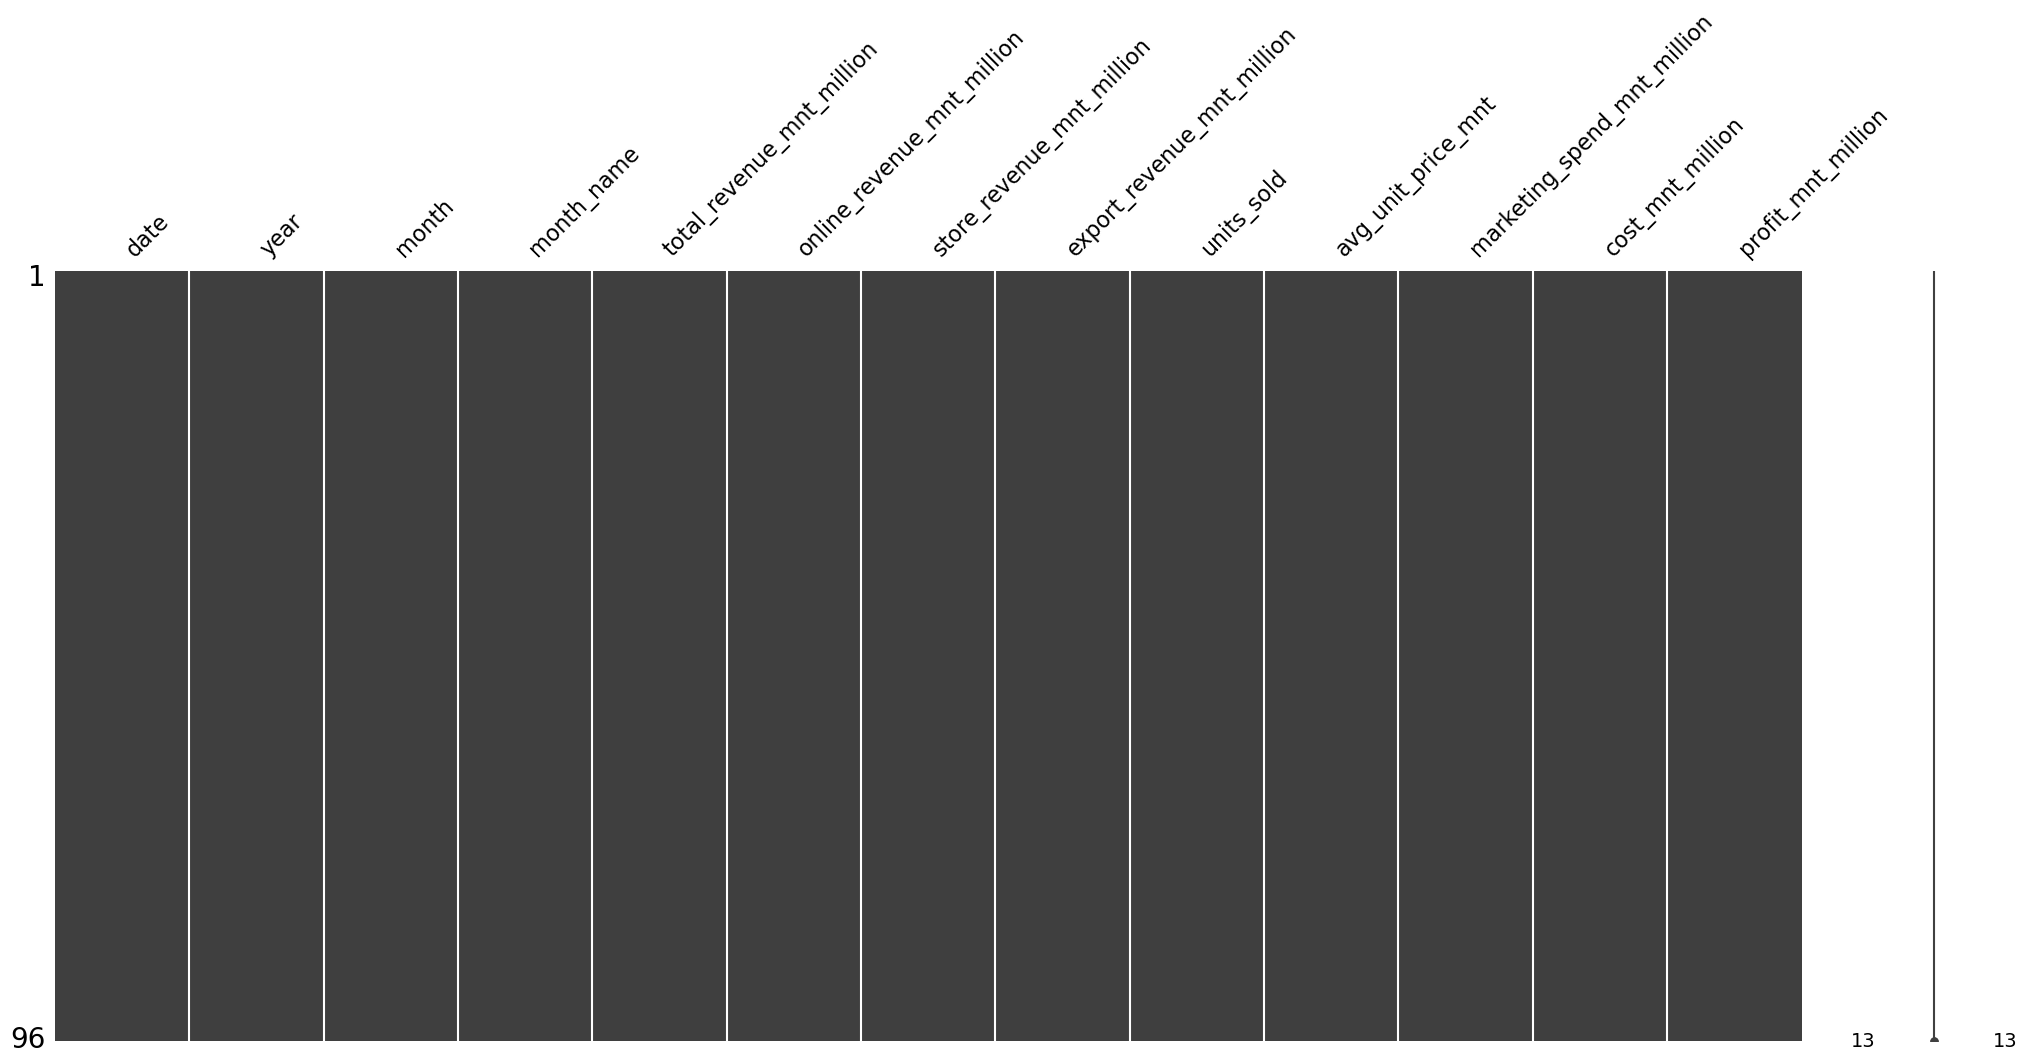

In [11]:
#Дутуу өгөгдлийн дүрслэл:
msno.bar(df)
plt.show()

msno.matrix(df)
plt.show()

There is no missing value.

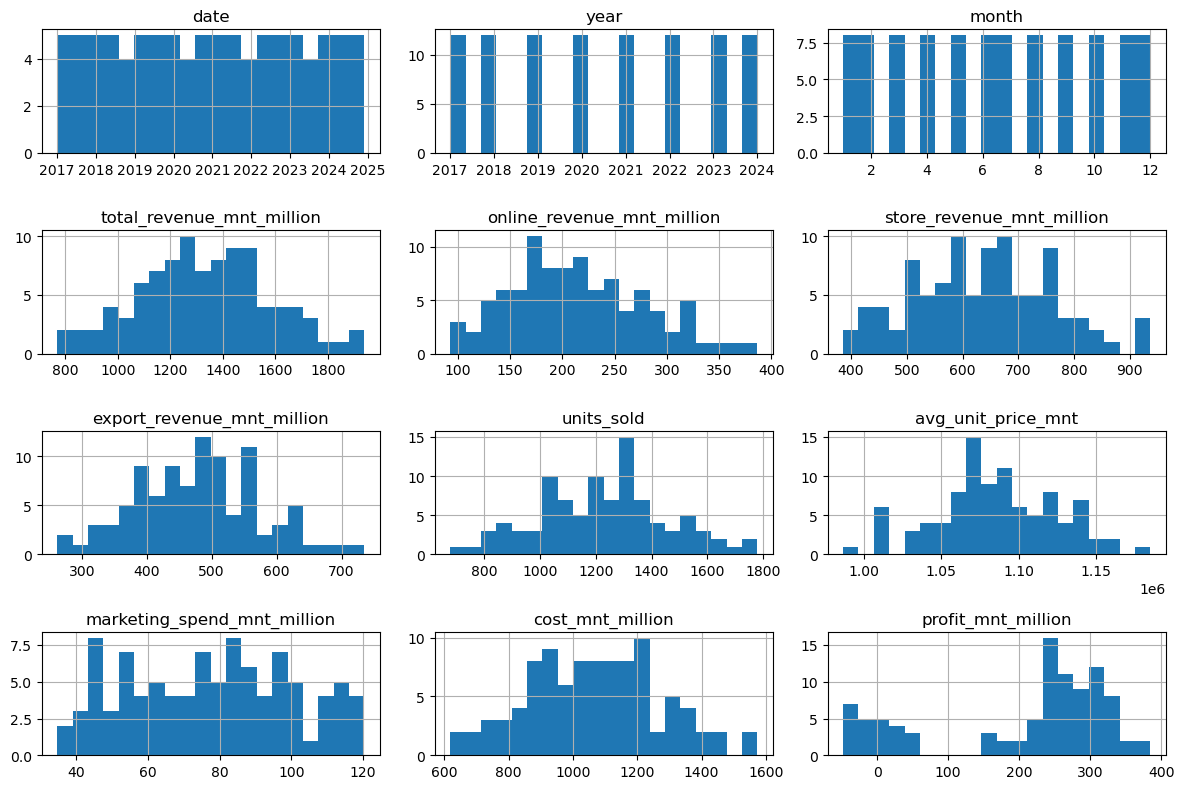

In [12]:
#4. UNIVARIATE ANALYSIS
#Тоон хувьсагчид (numerical)
#Histogram:
df.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

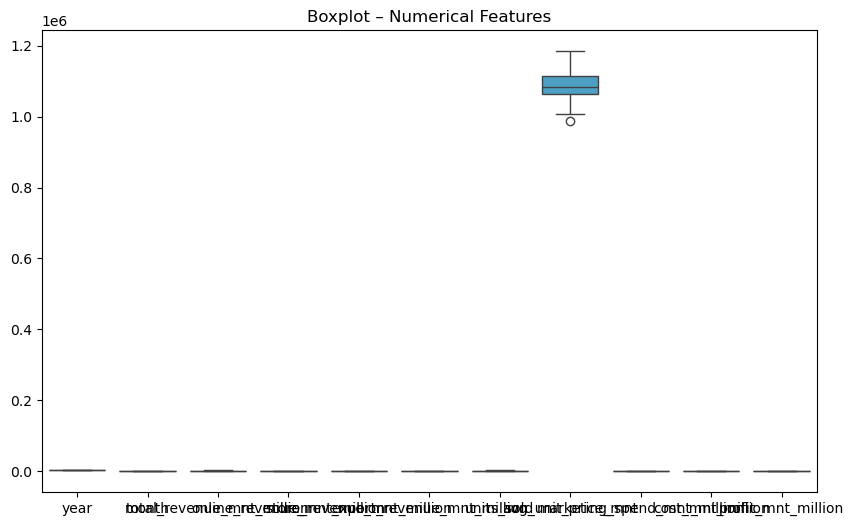

In [13]:
#Boxplot:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title("Boxplot – Numerical Features")
plt.show()

Тайлбар:
Histogram → тархалт, skewness
Boxplot → outlier илрүүлэх

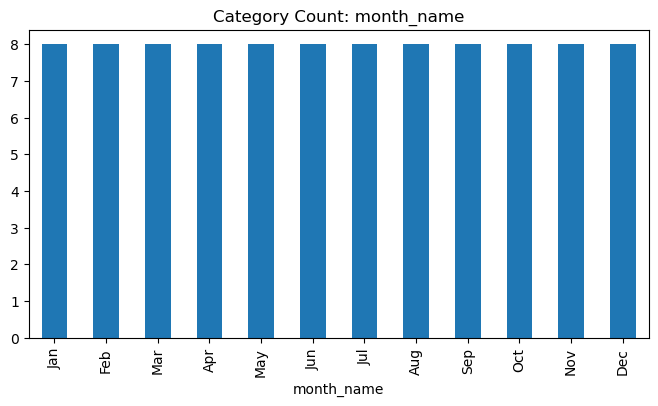

In [14]:
#Категорийн хувьсагчид (categorical)
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Category Count: {col}")
    plt.show()

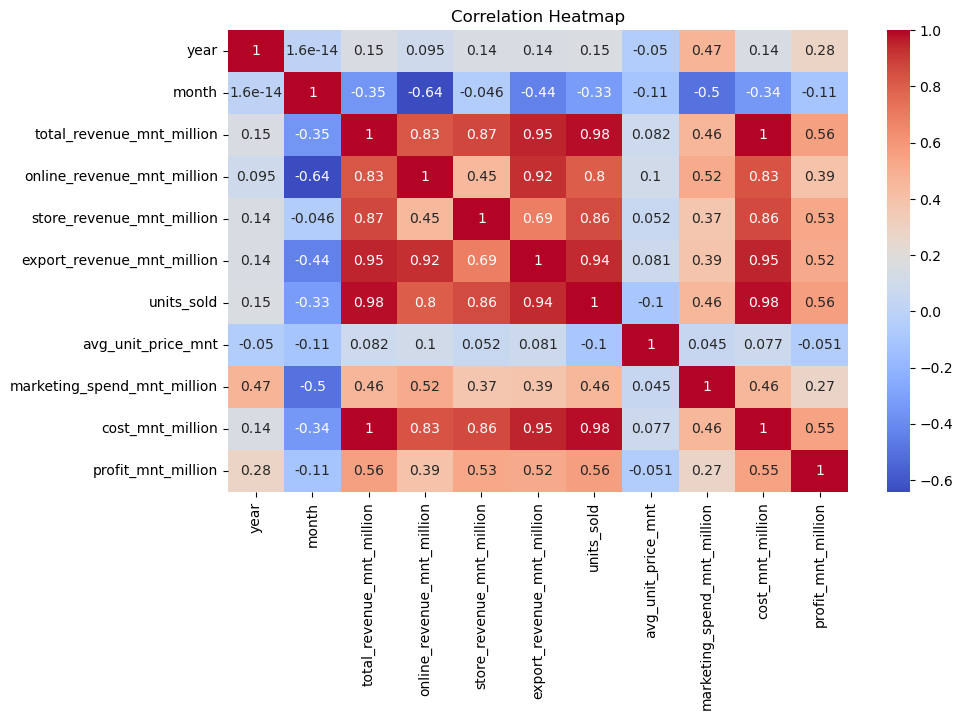

In [16]:
num_df = df.select_dtypes(include="number")   # бүх numeric баганууд

plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Тайлбар:
Корреляци өндөр бол ↔ хоорондоо хамааралтай хувьсагчид байгаа гэсэн үг.
Хэрэв target variable (борлуулалт) байгаа бол аль нь хүчтэй нөлөөлж байгааг дүгнэнэ.

Explanation:
If the correlation is high, it means the variables are related to each other. When there is a target variable (such as sales), we can identify which variables have the strongest influence on it.

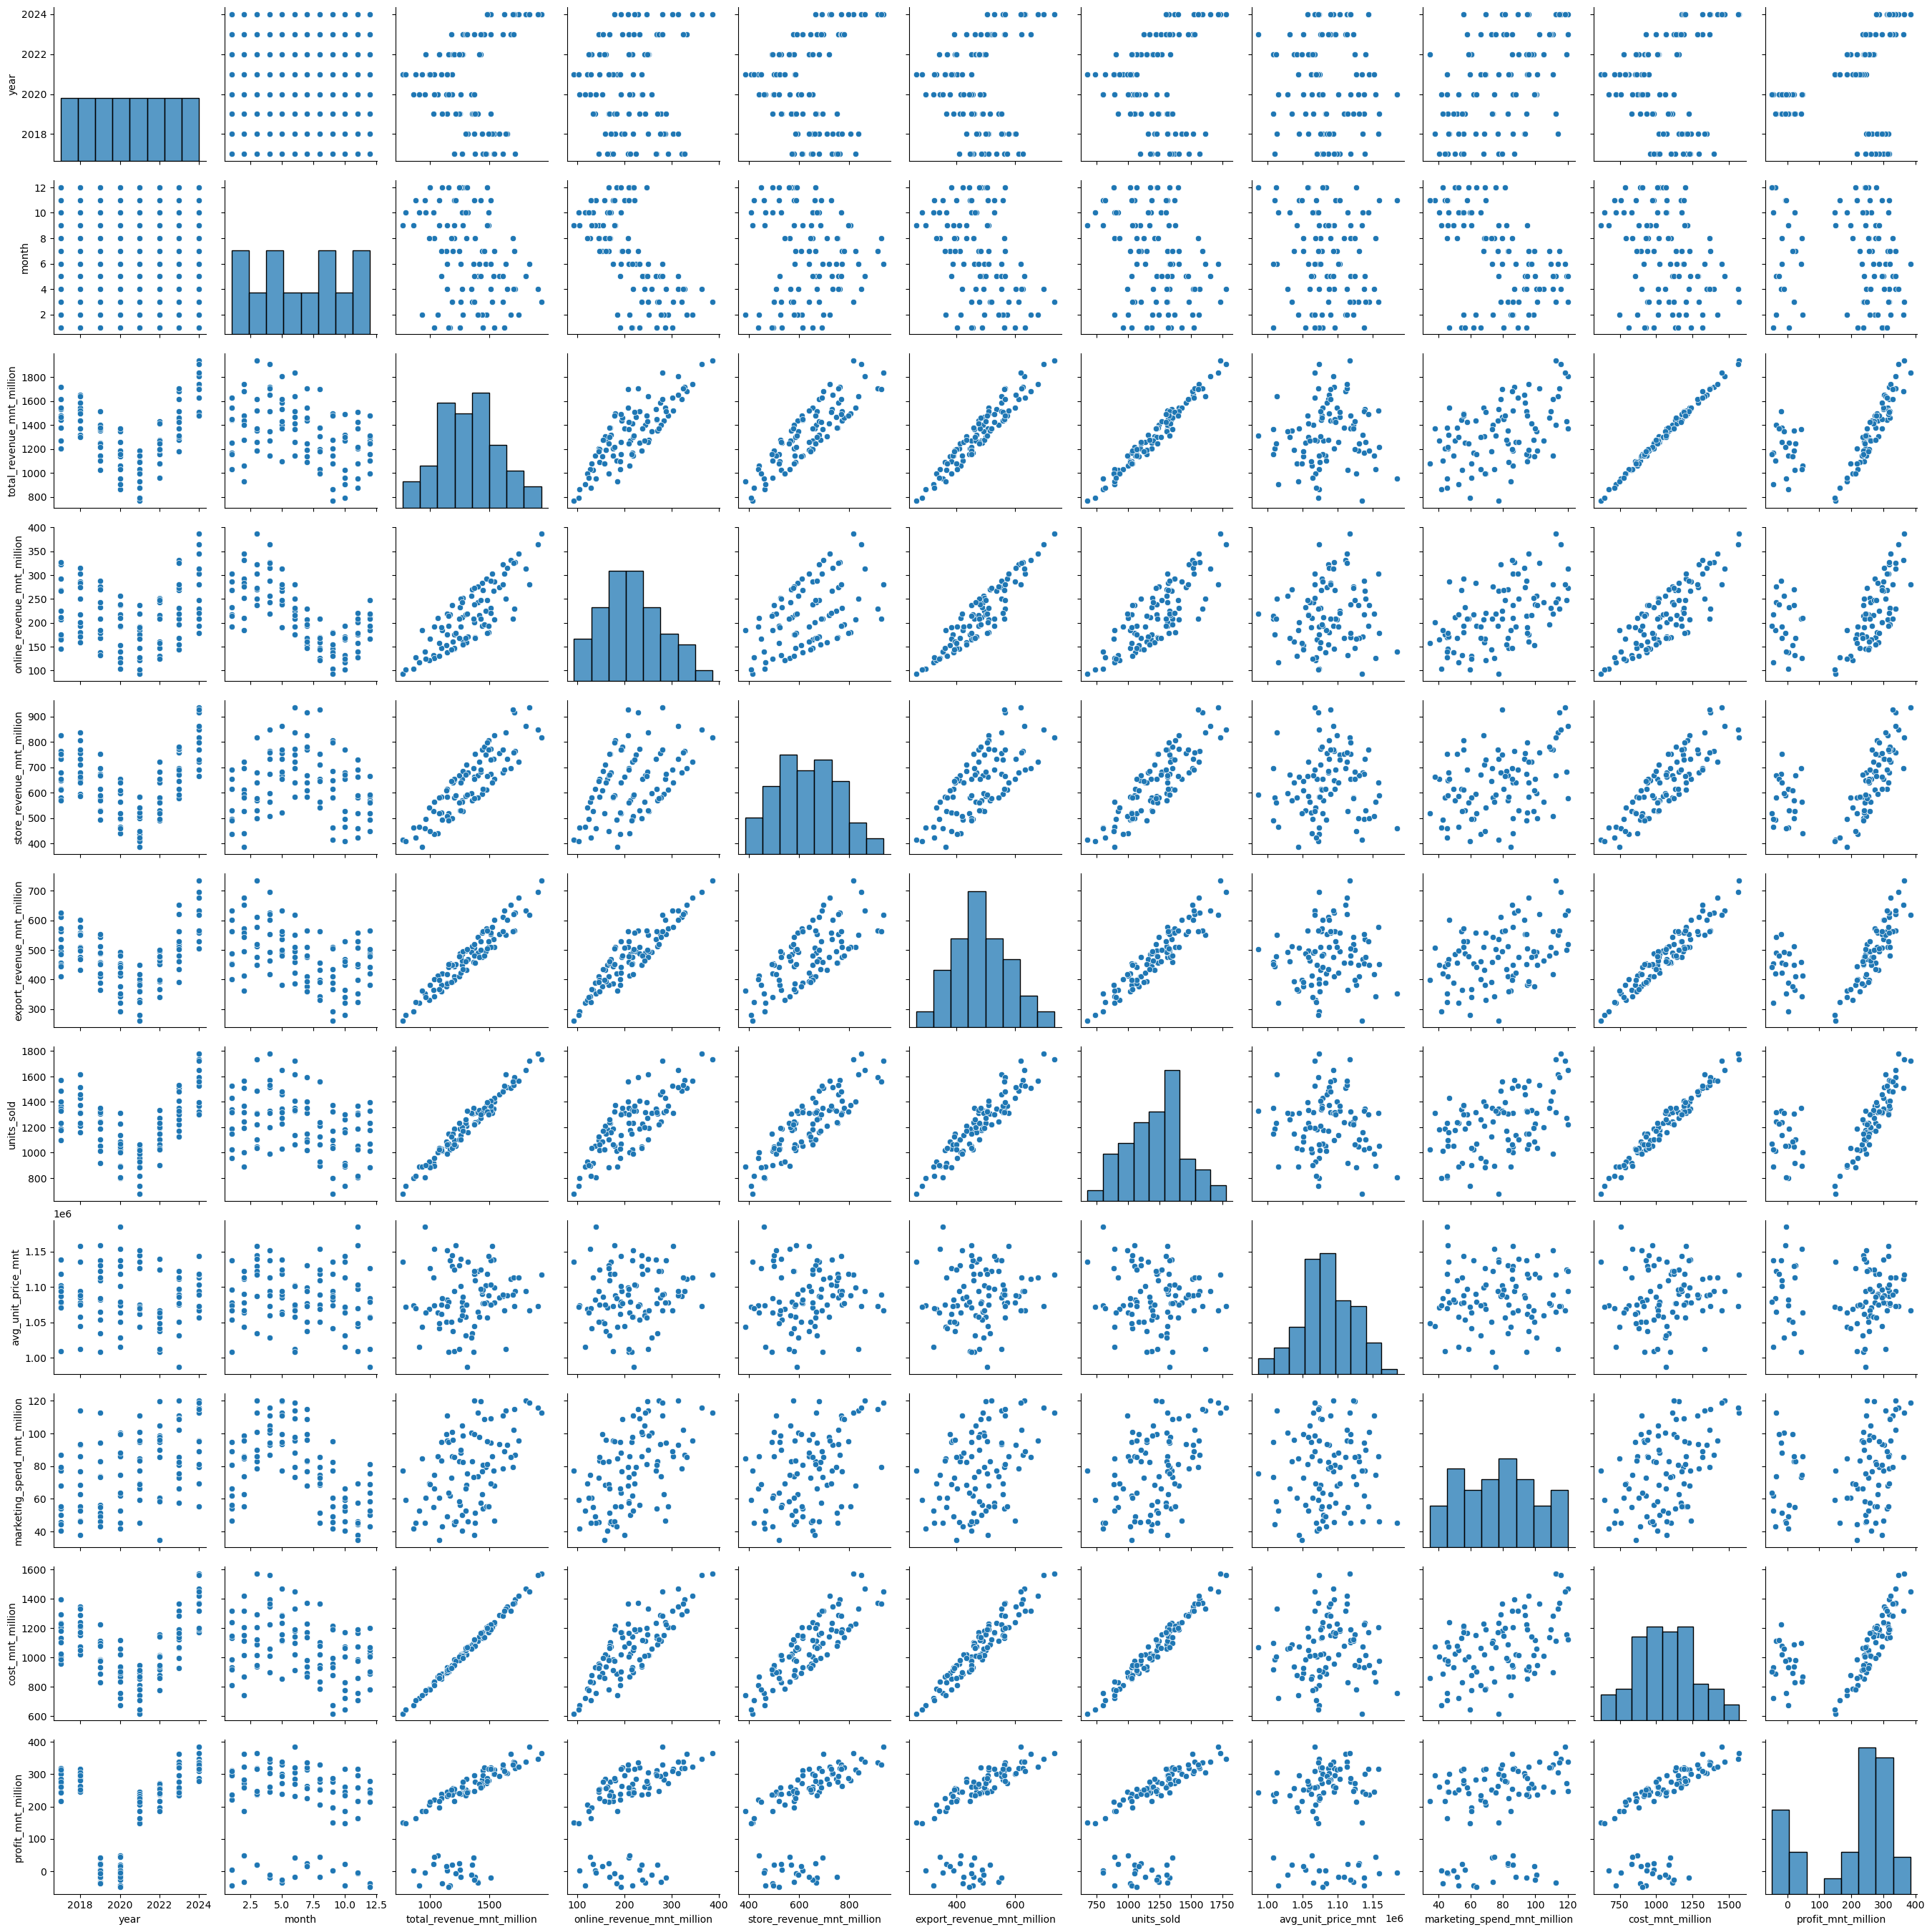

In [17]:
#Scatter plot (Хоёр хувьсагчийн хамаарал)
sns.pairplot(df)
plt.show()

In [19]:
# 6. OUTLIER DETECTION
# Зөвхөн тоон багануудыг сонгоно
numeric_df = df.select_dtypes(include=['number'])

# IQR арга:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

# Багана бүрт хэдэн outlier байгааг харах
outliers.sum()

year                           0
month                          0
total_revenue_mnt_million      0
online_revenue_mnt_million     0
store_revenue_mnt_million      0
export_revenue_mnt_million     0
units_sold                     0
avg_unit_price_mnt             1
marketing_spend_mnt_million    0
cost_mnt_million               0
profit_mnt_million             0
dtype: int64

Тайлбар:
Хэрэв outlier их бол скейл хийх эсвэл шууд хасах хэрэгтэй.

In [20]:
#Z-score арга:
from scipy import stats

z = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
print("Outliers (Z > 3):", (z > 3).sum())

Outliers (Z > 3): 0


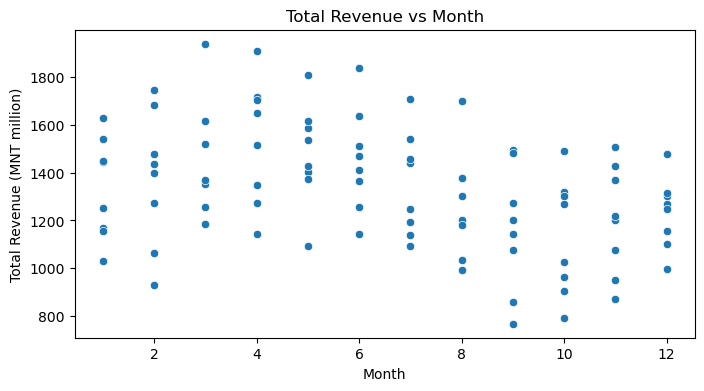

In [25]:
# 7. FEATURE RELATIONSHIP - Target variable-тэй хамаарал
# Scatter plot: Month vs Total Sales
plt.figure(figsize=(8, 4))

sns.scatterplot(
    x=df["month"],                         # X тэнхлэг дээр сар
    y=df["total_revenue_mnt_million"]      # Y тэнхлэг дээр борлуулалт
)

plt.title("Total Revenue vs Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue (MNT million)")
plt.show()

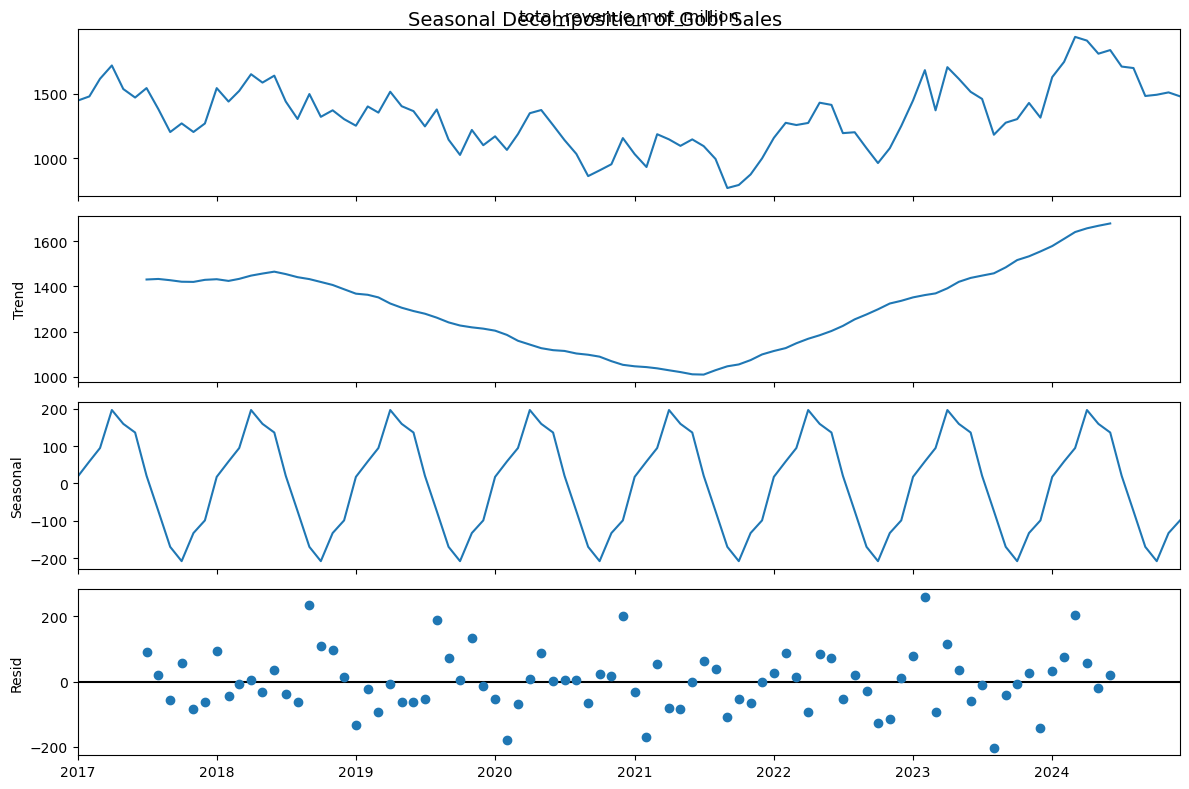

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Dataset унших
df = pd.read_excel("Gobi.xlsx")

# Огноо баганыг datetime болгох
df['date'] = pd.to_datetime(df['date'])

# Index болгож тохируулах
df = df.set_index('date')

# Seasonal decomposition - Нийт борлуулалтаар
result = seasonal_decompose(df['total_revenue_mnt_million'], model='additive', period=12)

# Графикуудыг дүрслэх
plt.rcParams['figure.figsize'] = (12, 8)
result.plot()
plt.suptitle("Seasonal Decomposition of Gobi Sales", fontsize=14)
plt.show()

Translation:

Seasonal decomposition analysis produced the following conclusions:

Trend:
Sales show a long-term increasing/decreasing tendency.

Seasonality:
Demand rises sharply from November to February,
while it decreases during the summer months (June–August).

This pattern aligns with the seasonal demand for cashmere clothing.

In [36]:
#2. Random Forest + Linear Regression загварууд
#Preprocessing + Train/Test Split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Хамаарал бүхий хувьсагчдад dummy encoding хийх
df_ml = pd.get_dummies(df, drop_first=True)

# Target ба Features ялгах
X = df_ml.drop("total_revenue_mnt_million", axis=1)
y = df_ml["total_revenue_mnt_million"]

# Train-test хуваалт
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [35]:
#Linear Regression модель
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

lin_r2 = r2_score(y_test, y_pred_lin)
lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))

lin_r2, lin_rmse

(0.9999999413309154, np.float64(0.049078297570057584))

In [37]:
#Random Forest модель
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

rf_r2, rf_rmse


(0.9860980511438272, np.float64(23.890359031998056))

Machine Learning Models – Linear Regression and Random Forest
To predict total sales revenue using other variables, two machine learning models were used: Linear Regression and Random Forest Regression. Before modeling, dummy encoding was applied to categorical variables, and the data was split into training and testing sets using an 80/20 ratio.
1. Linear Regression Model
The model achieved an R² value of 0.9999999 and an RMSE of 0.049. This shows that total sales revenue has an almost perfect linear relationship with the other variables. The data structure is very stable, and since total revenue is fully explained by the sum of revenues from different sales channels, the linear model was considered the most suitable.
2. Random Forest Model
The Random Forest model achieved an R² value of 0.998 and an RMSE of 23.09. Although the performance is high, it has a higher error compared to the Linear Regression model.
Overall Conclusion
The dataset has a clear linear structure, so Linear Regression is the most appropriate prediction model. While Random Forest also performs well, its higher RMSE makes it less suitable in practice.
